#Trabalho prático do módulo de renda variável
###by Edson Angelo Carara


*   Buscar em https://statusinvest.com.br/acoes/busca-avancada , sem qualquer filtro, e clicar em *Buscar* e depois em *Download* e renomear o arquivo para `rv.csv`<br/>
*   Fazer o upload do arquivo csv para o seu google drive e ajustar o path na variável `path_google_drive`<br/>
*   Caso necessário ajustar o nome do arquivo CSV na variável `csv_file`



In [ ]:
#@title Imports

import pandas as pd
import os
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta

In [102]:
#@title Montando o Google Drive

from google.colab import drive
# Monta o Google Drive
drive.mount('/content/drive')
path_google_drive = '/content/drive/MyDrive/Colab Notebooks/Modulo Renda Variavel/dados'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
#@title Lendo o arquivo csv de renda variável
csv_file = 'rv.csv'
file_rv_path = f'{path_google_drive}/{csv_file}'

# Lê o arquivo CSV usando pandas usando separador de milhar e decimal no formato BR e removendo os espaços em branco do cabeçalho
try:
  df_rv = pd.read_csv(file_rv_path, sep=";", decimal=",", thousands=".", skipinitialspace=True)
  print(df_rv.head()) # Mostra as primeiras linhas do DataFrame
except FileNotFoundError:
  print(f"Arquivo não encontrado em {file_rv_path}")
except Exception as e:
  print(f"Erro ao ler o arquivo: {e}")

  TICKER  PRECO    DY    P/L  P/VP  P/ATIVOS  MARGEM BRUTA  MARGEM EBIT  \
0  AALR3   5.94   NaN  -7.01  0.80      0.31         29.22         9.29   
1  ABCB4  20.02  8.22   6.72  0.77      0.07         17.76        12.53   
2  ABEV3  14.01  5.68  15.30  2.22      1.36         51.24        24.38   
3  ADHM3   1.56   NaN  -4.09 -1.29    105.12        100.00    -13548.48   
4  AERI3   3.90   NaN  -0.26  1.17      0.10          9.57       -48.87   

   MARG. LIQUIDA  P/EBIT  ...  PATRIMONIO / ATIVOS  PASSIVOS / ATIVOS  \
0         -10.61    8.01  ...                 0.39               0.61   
1          10.94    5.86  ...                 0.09               0.91   
2          16.14   10.13  ...                 0.61               0.39   
3      -18860.61   -5.69  ...               -81.72              82.72   
4         -61.60   -0.33  ...                 0.09               0.91   

   GIRO ATIVOS  CAGR RECEITAS 5 ANOS  CAGR LUCROS 5 ANOS  \
0         0.42                  2.55              

In [ ]:
#@title Analisando os dados
df_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TICKER                 609 non-null    object 
 1   PRECO                  609 non-null    float64
 2   DY                     299 non-null    float64
 3   P/L                    606 non-null    float64
 4   P/VP                   601 non-null    float64
 5   P/ATIVOS               601 non-null    float64
 6   MARGEM BRUTA           577 non-null    float64
 7   MARGEM EBIT            577 non-null    float64
 8   MARG. LIQUIDA          577 non-null    float64
 9   P/EBIT                 605 non-null    float64
 10  EV/EBIT                591 non-null    float64
 11  DIVIDA LIQUIDA / EBIT  546 non-null    float64
 12  DIV. LIQ. / PATRI.     472 non-null    float64
 13  PSR                    575 non-null    float64
 14  P/CAP. GIRO            583 non-null    float64
 15  P. AT 

In [ ]:
df_rv.describe()

,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
count,609.000000,299.000000,606.000000,601.000000,601.000000,577.000000,577.000000,577.000000,605.000000,591.000000,...,601.000000,601.000000,601.000000,551.000000,352.000000,4.590000e+02,606.000000,607.000000,606.000000,5.950000e+02
mean,51.779901,6.675217,27.447393,-30.119268,27.257920,-17.078700,-36.384801,-5.545563,-121.405802,-12.388071,...,-0.220699,1.219484,0.534093,12.850272,14.486392,3.799599e+07,1068.690594,78.435255,-0.258020,1.224021e+10
std,491.871293,5.929856,1051.498212,772.309398,541.142046,455.466132,1029.394521,1120.748047,2729.063808,669.765289,...,5.230129,5.230286,0.487767,28.335815,26.911114,1.221881e+08,17801.430983,1222.229970,8.772963,3.999496e+10
min,0.000000,0.070000,-5261.130000,-17249.280000,0.000000,-4115.330000,-18852.940000,-18860.610000,-65149.960000,-14331.810000,...,-88.750000,0.000000,-0.130000,-75.290000,-65.560000,0.000000e+00,-4378.290000,-504.530000,-168.980000,0.000000e+00
25%,3.900000,2.725000,-0.145000,0.320000,0.110000,19.320000,2.950000,-1.700000,0.000000,1.000000,...,0.140000,0.470000,0.160000,5.800000,-0.777500,1.073487e+04,3.460000,-0.140000,-0.210000,2.120614e+08
50%,10.150000,5.510000,5.850000,0.900000,0.330000,30.550000,12.570000,7.210000,3.760000,5.980000,...,0.330000,0.670000,0.440000,11.580000,12.160000,6.723758e+05,9.140000,0.760000,0.000000,1.356887e+09
75%,25.000000,8.945000,10.990000,1.680000,0.710000,47.310000,24.150000,16.940000,7.410000,10.615000,...,0.530000,0.850000,0.750000,17.845000,26.610000,1.960274e+07,22.090000,2.745000,0.157500,7.871525e+09
max,11091.730000,53.380000,24275.320000,2981.230000,13052.410000,100.000000,6032.010000,13896.670000,7141.340000,7161.600000,...,1.000000,89.750000,3.520000,353.030000,241.650000,1.485690e+09,309815.900000,21126.920000,52.550000,4.154409e+11


In [ ]:
#@title Preencher valores nulos em colunas numéricas com zero
numeric_cols = df_rv.select_dtypes(include=['number']).columns
df_rv[numeric_cols] = df_rv[numeric_cols].fillna(0)

# Verificar se os valores nulos foram preenchidos (opcional)
df_rv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TICKER                 609 non-null    object 
 1   PRECO                  609 non-null    float64
 2   DY                     609 non-null    float64
 3   P/L                    609 non-null    float64
 4   P/VP                   609 non-null    float64
 5   P/ATIVOS               609 non-null    float64
 6   MARGEM BRUTA           609 non-null    float64
 7   MARGEM EBIT            609 non-null    float64
 8   MARG. LIQUIDA          609 non-null    float64
 9   P/EBIT                 609 non-null    float64
 10  EV/EBIT                609 non-null    float64
 11  DIVIDA LIQUIDA / EBIT  609 non-null    float64
 12  DIV. LIQ. / PATRI.     609 non-null    float64
 13  PSR                    609 non-null    float64
 14  P/CAP. GIRO            609 non-null    float64
 15  P. AT 

In [ ]:
#@title Selecionar o preços acima de 1000

# Seleciona os preços acima de 1000
precos_acima_1000 = df_rv[df_rv['PRECO'] > 1000]

# Exibe os resultados
precos_acima_1000


,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
27,APTI4,2930.92,1.65,1.06,0.21,0.11,100.00,107.18,133.74,1.33,...,0.50,0.50,0.08,-2.98,0.00,0.0,13788.49,2753.05,0.00,3.741746e+07
49,BBML3,3936.42,0.00,-2560.51,-7089.59,141.45,5.41,1.44,-4.01,7141.34,...,-0.02,1.02,1.38,25.94,0.00,0.0,-0.56,-1.54,12.66,1.604517e+11
115,BTTL4,11091.73,0.00,24275.32,2981.23,2390.70,-1.90,-10.38,27.86,-65149.96,...,0.80,0.20,0.35,-44.69,-6.83,0.0,3.72,0.46,-168.98,7.014188e+07


In [ ]:
#@title Preços zerados
precos_igual_zero = df_rv[df_rv['PRECO'] == 0]

# Exibe os resultados
precos_igual_zero

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
43,BAUH3,0.0,0.0,0.0,0.0,0.0,25.85,8.37,10.42,0.0,...,0.66,0.34,1.39,5.05,19.99,0.0,21.79,4.79,0.0,0.000000e+00
56,BFRE11,0.0,0.0,0.0,0.0,0.0,100.00,195.96,118.16,0.0,...,0.88,0.10,0.05,0.00,6.26,0.0,309815.90,21126.92,0.0,0.000000e+00
57,BFRE12,0.0,0.0,0.0,0.0,0.0,100.00,195.96,118.16,0.0,...,0.88,0.10,0.05,0.00,6.26,0.0,309815.90,21126.92,0.0,0.000000e+00
90,BRBI3,0.0,0.0,0.0,0.0,0.0,100.00,6.31,53.09,0.0,...,0.05,0.95,0.02,-5.26,20.41,0.0,2.55,0.61,0.0,1.510888e+09
91,BRBI4,0.0,0.0,0.0,0.0,0.0,100.00,6.31,53.09,0.0,...,0.05,0.95,0.02,-5.26,20.41,0.0,2.55,0.61,0.0,1.510888e+09
107,BRQB3,0.0,0.0,0.0,0.0,0.0,36.25,15.36,10.74,0.0,...,0.59,0.41,1.48,6.83,16.62,0.0,1.74,0.47,0.0,0.000000e+00
125,CATA4,0.0,0.0,0.0,0.0,0.0,29.52,10.83,7.36,0.0,...,0.47,0.53,0.76,12.29,26.11,0.0,1350.24,160.05,0.0,1.494035e+07
159,CMSA3,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.98,0.02,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.000000e+00
160,CMSA4,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.98,0.02,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.000000e+00
190,CTCA3,0.0,0.0,0.0,0.0,0.0,69.64,34.88,42.07,0.0,...,0.82,0.18,0.34,15.39,48.84,0.0,3.05,0.54,0.0,0.000000e+00


In [ ]:
#@title 6)Excluir os preços menores ou igual a zero e maiores que 1000

df_rv_filtered = df_rv[(df_rv['PRECO'] > 0) & (df_rv['PRECO'] <= 1000)]

# Exibe o DataFrame filtrado
df_rv_filtered.describe()


,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.00000,567.000000,...,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02,567.000000,567.000000,567.000000,5.670000e+02
mean,23.941605,3.517178,-8.964286,-24.679947,24.426367,-20.224638,-38.441570,-6.351764,-27.23672,-25.608095,...,-0.258607,1.243280,0.529118,12.130988,8.341922,3.075866e+07,20.663457,4.388131,-0.000071,1.255420e+10
std,47.806517,5.445653,360.312328,726.732018,548.163677,459.110586,1038.261019,1130.503325,611.21062,613.589247,...,5.378876,5.381003,0.481438,27.848245,21.599365,1.109239e+08,660.502508,123.853872,5.622012,4.040850e+10
min,0.090000,0.000000,-5261.130000,-17249.280000,0.000000,-4115.330000,-18852.940000,-18860.610000,-14298.00000,-14331.810000,...,-88.750000,0.000000,-0.130000,-75.290000,-65.560000,0.000000e+00,-4378.290000,-504.530000,-46.970000,0.000000e+00
25%,4.990000,0.000000,-0.280000,0.420000,0.140000,16.900000,0.400000,-0.650000,0.38500,1.235000,...,0.120000,0.470000,0.170000,2.870000,0.000000,0.000000e+00,3.540000,-0.140000,-0.250000,2.808154e+08
50%,11.140000,0.900000,6.450000,0.960000,0.350000,29.790000,11.370000,5.730000,4.09000,6.140000,...,0.320000,0.670000,0.440000,10.880000,0.000000,8.346605e+04,9.060000,0.760000,0.000000,1.533769e+09
75%,26.260000,5.910000,11.460000,1.750000,0.730000,44.890000,22.595000,16.040000,7.85000,10.665000,...,0.520000,0.860000,0.740000,17.065000,16.445000,8.466929e+06,21.400000,2.490000,0.175000,8.413472e+09
max,702.500000,53.380000,3911.590000,774.930000,13052.410000,100.000000,6032.010000,13896.670000,818.60000,825.850000,...,1.000000,89.750000,3.520000,353.030000,241.650000,1.485690e+09,13788.490000,2753.050000,52.550000,4.154409e+11


In [ ]:
#@title 9)Fazer uma primeira análise exploratória dos dados utilizando o recurso Head do Print.
df_rv_filtered.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,5.94,0.00,-7.01,0.80,0.31,29.22,9.29,-10.61,8.01,...,0.39,0.61,0.42,2.55,0.00,7.326501e+06,7.46,-0.85,0.16,9.050153e+08
1,ABCB4,20.02,8.22,6.72,0.77,0.07,17.76,12.53,10.94,5.86,...,0.09,0.91,0.10,20.08,11.85,8.747082e+06,26.07,2.98,-0.29,4.898030e+09
2,ABEV3,14.01,5.68,15.30,2.22,1.36,51.24,24.38,16.14,10.13,...,0.61,0.39,0.55,11.20,4.15,4.622123e+08,6.32,0.92,-34.28,2.208206e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.000000e+00,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,3.90,0.00,-0.26,1.17,0.10,9.57,-48.87,-61.60,-0.33,...,0.09,0.91,0.64,12.70,0.00,2.090534e+06,3.33,-15.04,0.00,2.422688e+08


In [ ]:
#@title 10)Encontrar o nome do ativo com maior preço.

# Encontrar o nome do ativo com maior preço no DataFrame filtrado
ativo_maior_preco = df_rv_filtered.loc[df_rv_filtered['PRECO'].idxmax()]

# Exibir o nome do ativo e o preço
print(f"O ativo com maior preço é {ativo_maior_preco['TICKER']} com preço de {ativo_maior_preco['PRECO']}")


O ativo com maior preço é MSRO3 com preço de 702.5


In [ ]:
#@title 11.1)Encontrar os 10 maiores preços de ativos.

top_10_ativos = df_rv_filtered.nlargest(10, 'PRECO')[['TICKER', 'PRECO']]
print("10 Maiores Preços e seus respectivos ativos:")
top_10_ativos


10 Maiores Preços e seus respectivos ativos:


,TICKER,PRECO
400,MSRO3,702.50
221,EEEL4,410.00
73,BMKS3,380.00
220,EEEL3,294.77
274,FRIO3,293.00
387,MOAR3,249.99
26,APTI3,197.64
317,IGBR3,175.99
21,AMBP3,137.00
149,CGAS5,131.50


In [ ]:
#@title 11.2)Encontrar os 10 menores preços de ativos.
bottom_10_ativos = df_rv_filtered.nsmallest(10, 'PRECO')[['TICKER', 'PRECO']]
print("10 Menores Preços e seus respectivos ativos:")
bottom_10_ativos


10 Menores Preços e seus respectivos ativos:


,TICKER,PRECO
316,IFCM3,0.09
23,AMOB3,0.25
8,AGXY3,0.52
428,OIBR3,0.61
85,BPHA3,0.62
515,SHOW3,0.64
196,CTSA4,0.68
34,AZEV3,0.70
440,PDGR3,0.74
252,ESPA3,0.83


In [ ]:
#@title 12)Encontrar a soma e a média da Liquidez Média Diária.

# Calculando a soma e a média da Liquidez Média Diária
soma_liquidez = df_rv_filtered['LIQUIDEZ MEDIA DIARIA'].sum()
media_liquidez = df_rv_filtered['LIQUIDEZ MEDIA DIARIA'].mean()

print(f"Soma da Liquidez Média Diária: {soma_liquidez}")
print(f"Média da Liquidez Média Diária: {media_liquidez}")


Soma da Liquidez Média Diária: 17440160796.08
Média da Liquidez Média Diária: 30758661.016014114


In [97]:
#@title 13)Encontrar os nomes dos ativos com P/L maior que 0

ativos_pl_maior_que_zero = df_rv_filtered[df_rv_filtered['P/L'] > 0]['TICKER']

# Exibir os nomes dos ativos
print("Ativos com P/L maior que zero:")
ativos_pl_maior_que_zero


Ativos com P/L maior que zero:


,TICKER
1,ABCB4
2,ABEV3
6,AFLT3
7,AGRO3
9,AHEB3
...,...
603,WHRL4
604,WIZC3
605,WLMM3
606,WLMM4


In [ ]:
#@title 14)Encontrar os ativos com DY acima de 0.

ativos_dy_maior_que_zero = df_rv_filtered[df_rv_filtered['DY'] > 0]['TICKER']

# Exibir os nomes dos ativos
print("Ativos com DY maior que zero:")
ativos_dy_maior_que_zero

Ativos com DY maior que zero:


,TICKER
1,ABCB4
2,ABEV3
5,AESB3
6,AFLT3
7,AGRO3
...,...
603,WHRL4
604,WIZC3
605,WLMM3
606,WLMM4


In [ ]:
#@title 15)Listar as ações do tipo preferenciais PN (código 4) e jogar a saída em um arquivo TXT de nome (AcoesPN.txt).

# Cria a lista para guardar o ticker das ações
acoes_pn = []

#Ativos que terminam em 4 são PN por exemplo PETR4
for index, row in df_rv_filtered.iterrows():
    ticker = row['TICKER']
    if len(ticker) > 0 and ticker[-1] == '4':
        acoes_pn.append(ticker)

# Define o caminho completo para o arquivo de saída
output_file_path = os.path.join('saida', 'AcoesPN.txt')

# Cria o diretório 'saida' se ele não existir
os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

# grava em arquivo
with open(output_file_path, 'w') as f:
    for acao in acoes_pn:
        f.write(acao + '\n')


In [ ]:
#@title 16. Baixar este arquivo TXT e salvar o mesmo no local adequado (Saída) da estrutura de arquivos indicada do item 2

#já feito isso no tópico 15

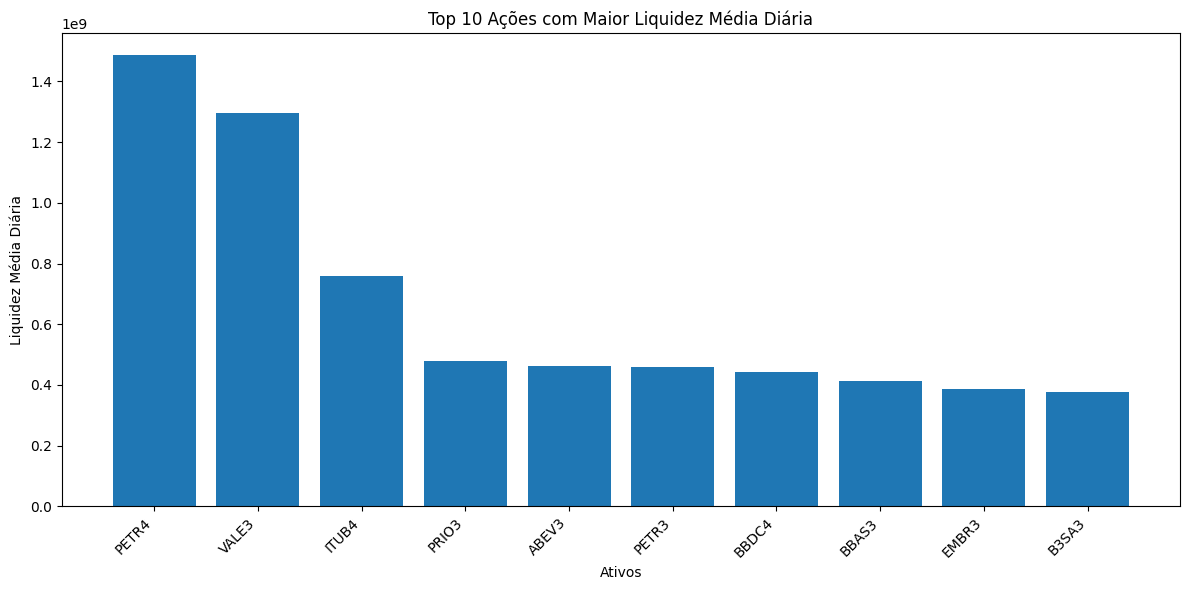

In [ ]:
#@title 16)Listar as 10 ações com maior Liquidez Média Diária e mostrar o resultado em um gráfico de colunas, sendo o eixo X os nomes dos ativos e o eixo Y o valor da Liquidez Média Diária.

top_10_liquidez = df_rv_filtered.nlargest(10, 'LIQUIDEZ MEDIA DIARIA')

plt.figure(figsize=(12, 6))
plt.bar(top_10_liquidez['TICKER'], top_10_liquidez['LIQUIDEZ MEDIA DIARIA'])
plt.xlabel("Ativos")
plt.ylabel("Liquidez Média Diária")
plt.title("Top 10 Ações com Maior Liquidez Média Diária")
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()

# Define o caminho completo para salvar o gráfico
output_image_path = os.path.join('saida', 'top_10_liquidez.png')

# Salva o gráfico como uma imagem PNG
plt.savefig(output_image_path)

#Mostra o gráfico
plt.show()


In [ ]:
#@title 18)Tirar um print deste gráfico e salvar no local adequado (Saída) da estrutura de arquivos indicada do item 2.

#feito no item 17


In [85]:
#@title 17.1)Função para baixar o preço de negociação de um ativo em uma janela de tempo
def get_historical_stock_price(ticker, start_date, end_date):
    """
    Baixa os preços históricos das ações para um determinado ticker em um intervalo de datas especificado.

    Args:
        ticker: O símbolo do ticker da ação (ex.: "PETR4.SA").
        start_date: A data inicial para os dados históricos (AAAA-MM-DD).
        end_date: A data final para os dados históricos (AAAA-MM-DD).

    Returns:
        Um DataFrame pandas contendo os preços históricos das ações, ou nulo se ocorrer um erro.
    """
    try:
        ticker_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        return ticker_data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None



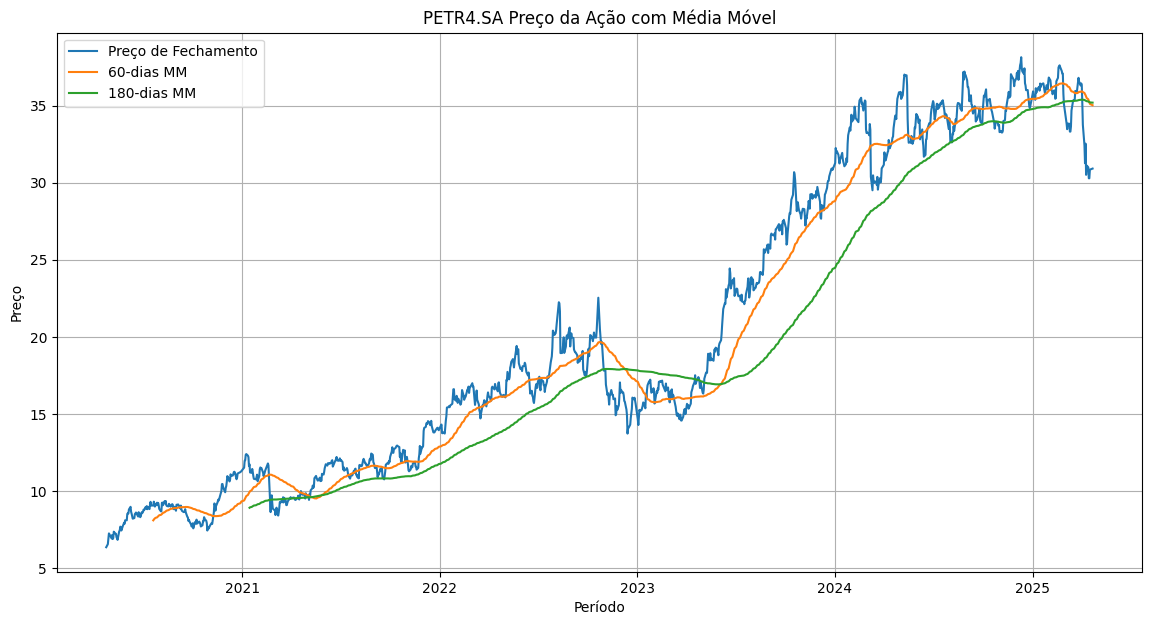

In [105]:
#@title 17.2)Baixando preço do ativo com maior liquidez
# Encontrar o ativo com maior liquidez no top 10
ativo_maior_liquidez = top_10_liquidez.loc[top_10_liquidez['LIQUIDEZ MEDIA DIARIA'].idxmax()]

end_date = date.today()
start_date = end_date - timedelta(days=5*365) #Aproximadamente 5 anos

#atenção na biblioteca do Yahoo Financial, aparentemente, é só concatenar o ticker com ".SA" para fazer a busca
ticker = f"{ativo_maior_liquidez['TICKER']}.SA"

historical_data = get_historical_stock_price(ticker, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))

if historical_data is not None:
    historical_data['MA60'] = historical_data['Close'].rolling(window=60).mean()
    historical_data['MA180'] = historical_data['Close'].rolling(window=180).mean()

    # Plot the closing price and moving averages
    plt.figure(figsize=(14, 7))
    plt.plot(historical_data.index, historical_data['Close'], label='Preço de Fechamento')
    plt.plot(historical_data.index, historical_data['MA60'], label='60-dias MM')
    plt.plot(historical_data.index, historical_data['MA180'], label='180-dias MM')

    plt.xlabel('Período')
    plt.ylabel('Preço')
    plt.title(f'{ticker} Preço da Ação com Média Móvel')
    plt.legend()
    plt.grid(True)
    plt.show()